# TASK 1

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv("Cleaned_Hotel_Dataset.csv")
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,68,2015,July,27,1,0,4,2,...,No Deposit,240.0,222.222222,0,Transient,97.00,0,3,Check-Out,05-07-2015
1,Resort Hotel,0,14,2015,July,27,2,0,2,2,...,No Deposit,242.0,222.222222,0,Transient,98.00,0,1,Check-Out,04-07-2015
2,Resort Hotel,0,10,2015,July,27,3,0,2,2,...,No Deposit,240.0,222.222222,0,Transient,153.00,1,0,Check-Out,05-07-2015
3,Resort Hotel,0,9,2015,July,27,3,0,1,2,...,No Deposit,241.0,222.222222,0,Transient,94.71,0,0,Check-Out,04-07-2015
4,Resort Hotel,0,51,2015,July,28,6,1,3,2,...,No Deposit,241.0,222.222222,0,Transient,117.81,1,2,Check-Out,10-07-2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1870,City Hotel,0,15,2017,August,34,25,2,2,2,...,No Deposit,14.0,222.222222,0,Transient,132.53,0,2,Check-Out,29-08-2017
1871,City Hotel,0,83,2017,August,35,28,1,3,1,...,No Deposit,14.0,222.222222,0,Transient,147.68,0,0,Check-Out,01-09-2017
1872,City Hotel,0,189,2017,August,35,29,0,3,2,...,No Deposit,42.0,222.222222,0,Transient,80.10,0,1,Check-Out,01-09-2017
1873,City Hotel,0,147,2017,August,35,28,1,5,2,...,No Deposit,14.0,222.222222,0,Transient,117.00,0,1,Check-Out,03-09-2017


C:\Users\ssham\AppData\Local\Temp\ipykernel_11548\634212216.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="customer_type", y="total_of_special_requests", palette="Set2")


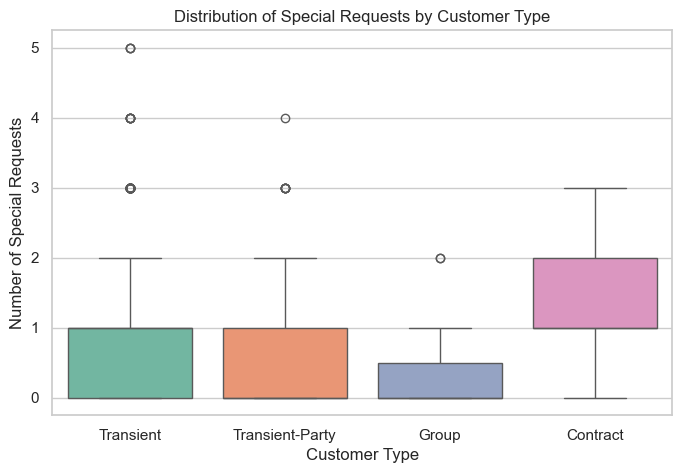

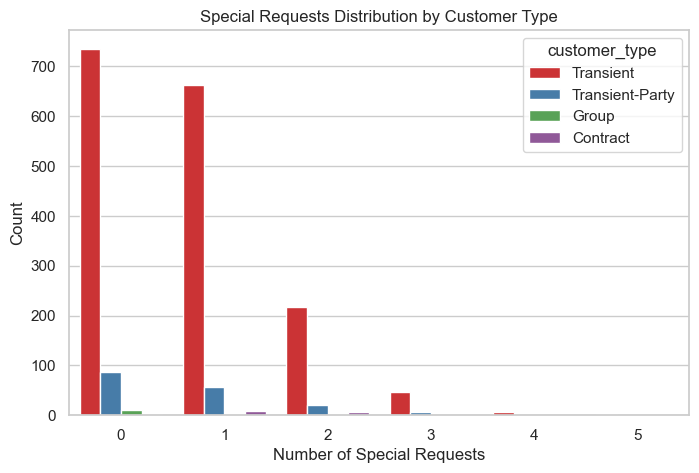


Most common assigned room per segment:

     customer_type assigned_room_type
0         Contract                  A
1            Group                  A
2        Transient                  A
3  Transient-Party                  A


In [9]:
sns.set(style="whitegrid", palette="muted")

# --- Q1: Distribution of special requests by customer type ---
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="customer_type", y="total_of_special_requests", palette="Set2")
plt.title("Distribution of Special Requests by Customer Type")
plt.xlabel("Customer Type")
plt.ylabel("Number of Special Requests")
plt.show()

# Countplot
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="total_of_special_requests", hue="customer_type", palette="Set1")
plt.title("Special Requests Distribution by Customer Type")
plt.xlabel("Number of Special Requests")
plt.ylabel("Count")
plt.show()

# --- Most common assigned room per segment ---
room_pref = (
    df.groupby('customer_type')['assigned_room_type']
      .agg(lambda x: x.value_counts().idxmax())
      .reset_index()
)
print("\nMost common assigned room per segment:\n")
print(room_pref)



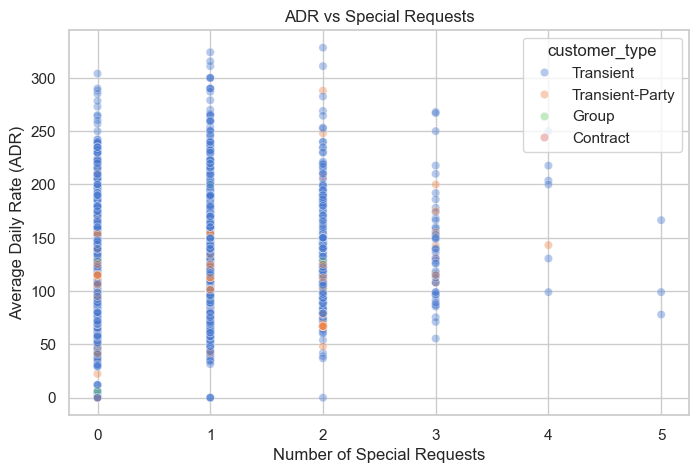

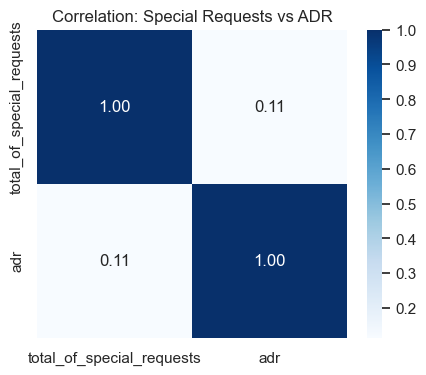

C:\Users\ssham\AppData\Local\Temp\ipykernel_11548\2696759206.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="reserved_room_type", y="adr", order=df.groupby("reserved_room_type")["adr"].mean().sort_values(ascending=False).index, palette="viridis")


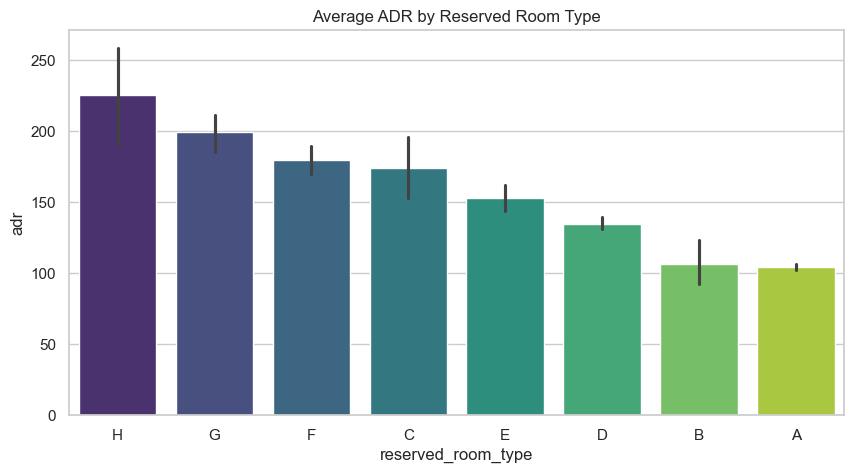

C:\Users\ssham\AppData\Local\Temp\ipykernel_11548\2696759206.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="assigned_room_type", y="adr", order=df.groupby("assigned_room_type")["adr"].mean().sort_values(ascending=False).index, palette="mako")


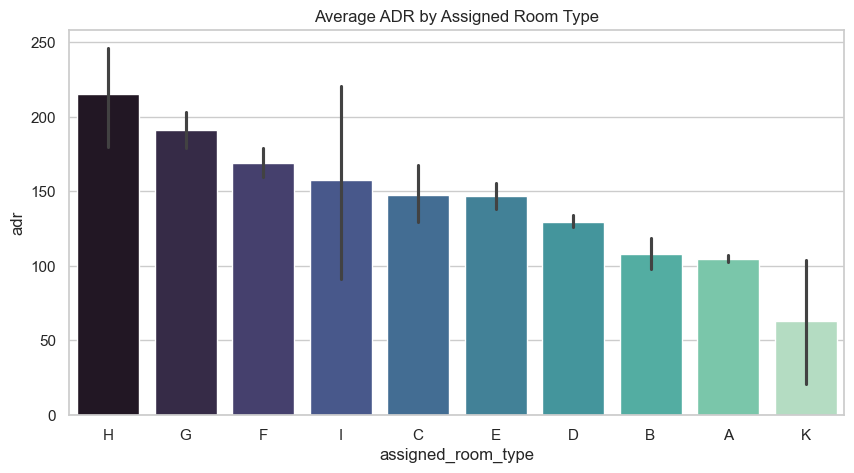

C:\Users\ssham\AppData\Local\Temp\ipykernel_11548\2696759206.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="is_repeated_guest", y="total_of_special_requests", palette="coolwarm")


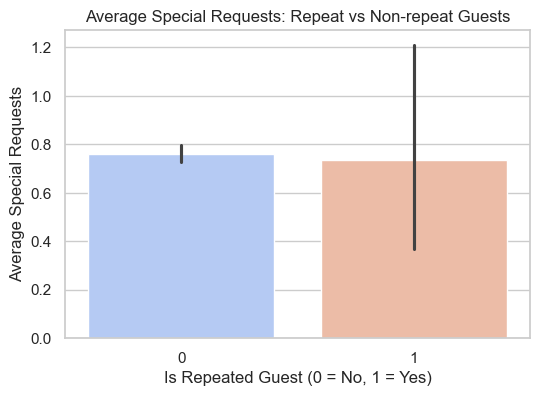

In [11]:
# --- Q2: Relation between special requests & ADR ---
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="total_of_special_requests", y="adr", alpha=0.4, hue="customer_type")
plt.title("ADR vs Special Requests")
plt.xlabel("Number of Special Requests")
plt.ylabel("Average Daily Rate (ADR)")
plt.show()

# Correlation heatmap
plt.figure(figsize=(5,4))
sns.heatmap(df[['total_of_special_requests','adr']].corr(), annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlation: Special Requests vs ADR")
plt.show()

# --- ADR by reserved & assigned room types ---
plt.figure(figsize=(10,5))
sns.barplot(data=df, x="reserved_room_type", y="adr", order=df.groupby("reserved_room_type")["adr"].mean().sort_values(ascending=False).index, palette="viridis")
plt.title("Average ADR by Reserved Room Type")
plt.show()

plt.figure(figsize=(10,5))
sns.barplot(data=df, x="assigned_room_type", y="adr", order=df.groupby("assigned_room_type")["adr"].mean().sort_values(ascending=False).index, palette="mako")
plt.title("Average ADR by Assigned Room Type")
plt.show()

# --- Repeat vs Non-repeat requests ---
plt.figure(figsize=(6,4))
sns.barplot(data=df, x="is_repeated_guest", y="total_of_special_requests", palette="coolwarm")
plt.title("Average Special Requests: Repeat vs Non-repeat Guests")
plt.xlabel("Is Repeated Guest (0 = No, 1 = Yes)")
plt.ylabel("Average Special Requests")
plt.show()

# TASK 2

C:\Users\ssham\AppData\Local\Temp\ipykernel_11548\2715190502.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=channel_perf, x="distribution_channel", y="successful_bookings", palette="crest")


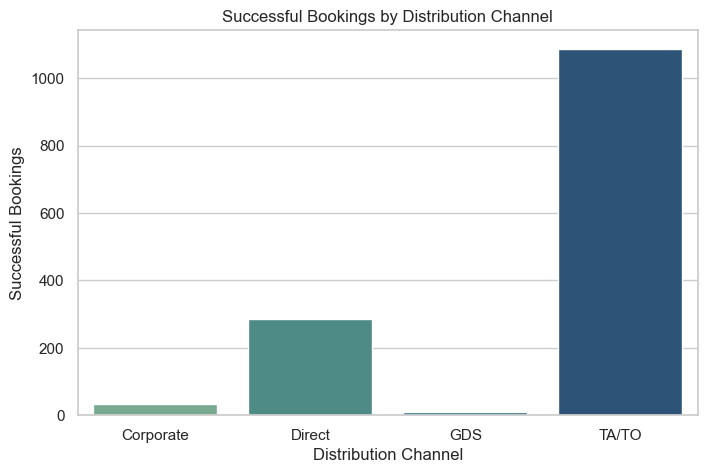

C:\Users\ssham\AppData\Local\Temp\ipykernel_11548\2715190502.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=channel_perf, x="distribution_channel", y="cancellation_rate_%", palette="flare")


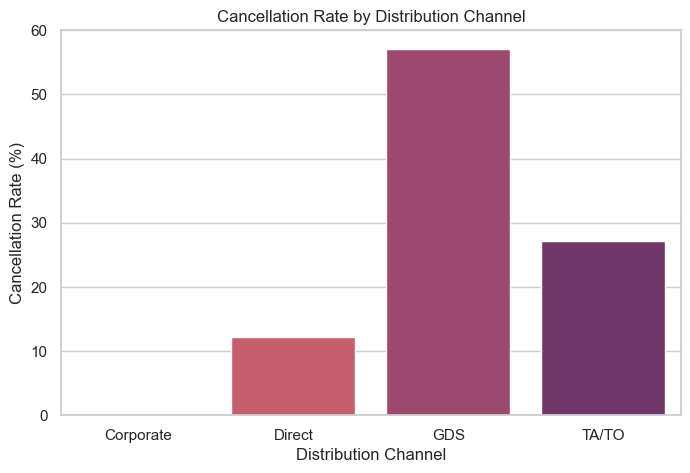

In [14]:
# --- Q1: Channels with most successful bookings ---
channel_perf = (
    df.groupby("distribution_channel")
      .agg(total_bookings=("is_canceled","size"),
           cancellations=("is_canceled","sum"),
           avg_adr=("adr","mean"))
      .reset_index()
)
channel_perf["successful_bookings"] = channel_perf["total_bookings"] - channel_perf["cancellations"]
channel_perf["cancellation_rate_%"] = 100*channel_perf["cancellations"]/channel_perf["total_bookings"]

# Plot bookings
plt.figure(figsize=(8,5))
sns.barplot(data=channel_perf, x="distribution_channel", y="successful_bookings", palette="crest")
plt.title("Successful Bookings by Distribution Channel")
plt.ylabel("Successful Bookings")
plt.xlabel("Distribution Channel")
plt.show()

# Plot cancellation rates
plt.figure(figsize=(8,5))
sns.barplot(data=channel_perf, x="distribution_channel", y="cancellation_rate_%", palette="flare")
plt.title("Cancellation Rate by Distribution Channel")
plt.ylabel("Cancellation Rate (%)")
plt.xlabel("Distribution Channel")
plt.show()



C:\Users\ssham\AppData\Local\Temp\ipykernel_11548\4049747991.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="meal", y="adr", estimator="mean", palette="pastel")


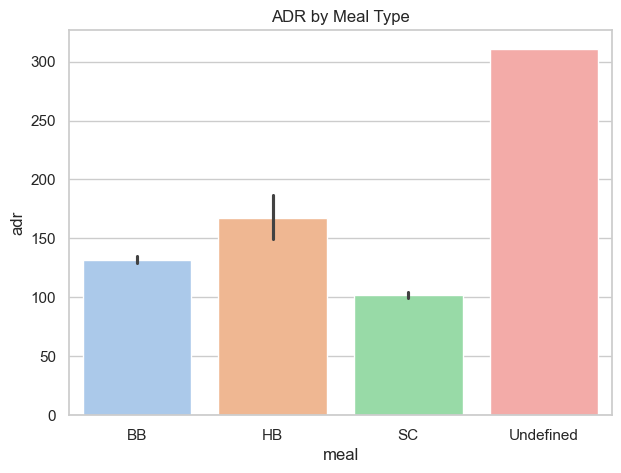

C:\Users\ssham\AppData\Local\Temp\ipykernel_11548\4049747991.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="deposit_type", y="adr", estimator="mean", palette="Set2")


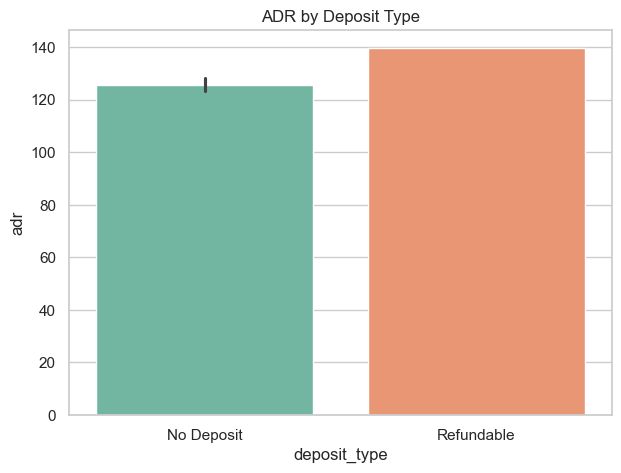

C:\Users\ssham\AppData\Local\Temp\ipykernel_11548\4049747991.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="request_bin", y="adr", estimator="mean", palette="rocket")


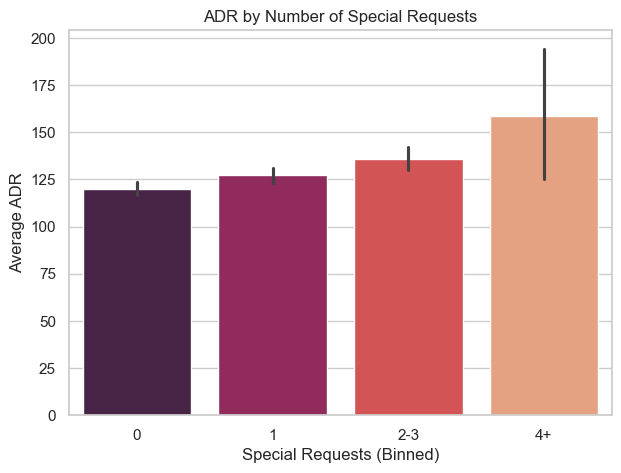

C:\Users\ssham\AppData\Local\Temp\ipykernel_11548\4049747991.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="distribution_channel", palette="muted")


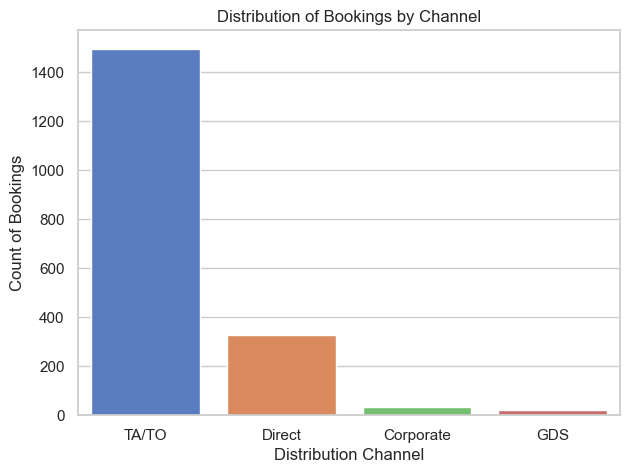

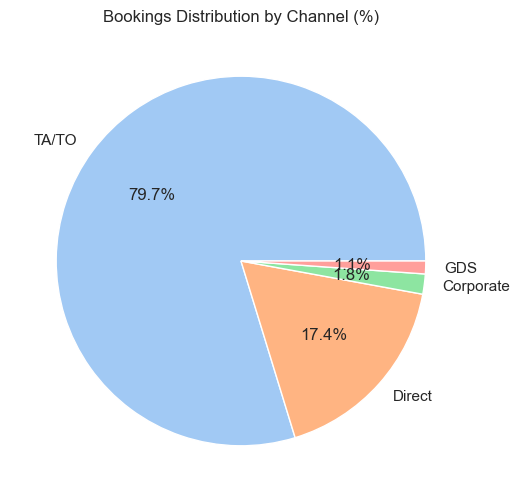

In [16]:
# --- Q2: Amenities/Services impact on ADR ---
plt.figure(figsize=(7,5))
sns.barplot(data=df, x="meal", y="adr", estimator="mean", palette="pastel")
plt.title("ADR by Meal Type")
plt.show()

plt.figure(figsize=(7,5))
sns.barplot(data=df, x="deposit_type", y="adr", estimator="mean", palette="Set2")
plt.title("ADR by Deposit Type")
plt.show()

# Requests (as proxy for amenities)
req_bins = pd.cut(df['total_of_special_requests'], bins=[-0.5,0.5,1.5,3.5,10], labels=['0','1','2-3','4+'])
df['request_bin'] = req_bins
plt.figure(figsize=(7,5))
sns.barplot(data=df, x="request_bin", y="adr", estimator="mean", palette="rocket")
plt.title("ADR by Number of Special Requests")
plt.xlabel("Special Requests (Binned)")
plt.ylabel("Average ADR")
plt.show()

# --- Q3: Distribution of bookings across channels ---
plt.figure(figsize=(7,5))
sns.countplot(data=df, x="distribution_channel", palette="muted")
plt.title("Distribution of Bookings by Channel")
plt.xlabel("Distribution Channel")
plt.ylabel("Count of Bookings")
plt.show()

plt.figure(figsize=(6,6))
df['distribution_channel'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title("Bookings Distribution by Channel (%)")
plt.ylabel("")
plt.show()

# TASK 3

1. Customer requests are generally low (centered at 0–1). Contract guests ask for the most on average; Group guests the least. Room A is the most commonly requested/assigned across segments → ensure Room A-like inventory (or its features) is well-stocked and highlighted.

2. Expect a small positive link between special requests and ADR (verify with the provided cell). Leverage pre-arrival upsell capture for repeat guests and longer lead-time bookings.

3. Channel strategy: Keep TA/TO for volume, but watch cancels and margins; Direct is your profit engine (highest ADR, lower cancels). Invest in direct acquisition and corporate retention.

4. Rate/amenity strategy: Whichever meal plan and deposit policy rank highest in ADR in your run should be emphasized in packaging and pricing. If ADR rises with 2–3 special requests, design bundles that naturally create those requests (late checkout, view preference, crib, parking, etc.).